### Thank you for the review of my project! I've addressed the feedback below :)

In [121]:
#first import the data from csv.
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
from scipy import stats

In [8]:
#open the data
path = 'stroopdata.csv'
data = pd.read_csv(path)

### 1. What is our independent variable? What is our dependent variable?

Each person's time is dependent on congruence, i.e. whether the colors match the words. Time is the dependent variable; congruence is the independent variable.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

* **Null hypothesis:** There is no difference between the time it takes to read the congruent and incongruent word lists

* **Alternative hypothesis:** There is a difference between the time it takes to read the congruent and incongruent words lists
    
* In mathematical terms, this means that for any user $i$,

$d = incongruent$ $time_{i}$ - $congruent$  $time_{i}$

$H0: μd = 0$

$HA: μd ≠ 0$


* In this experiment, we're trying to see if there is a statistically significant **change** in time it takes to read the words based on congruence. Because we have two measurements for every respondent in the sample, and because every person's 'baseline' time is different, we need a **paired test.**

* Because we have fewer than 30 respondents and do not know the population mean, we must perform a **t-test** rather than a Z-test.

* We will do a **two-tailed test** to account for the possibility that incongruent time is actually lower than congruent time. 

**Conclusion: a two-tailed paired t-test is the correct statistical test.**

### 3a. Descriptive Statistics: Central Tendency

In [4]:
#table of central tendancy stats
central_tendancy_table = { 
    'congruent' : [round(np.mean(data.Congruent),2),
                   round(np.median(data.Congruent.sort_values()),2)],
    'incongruent' : [round(np.mean(data.Incongruent),2),
                     round(np.median(data.Incongruent.sort_values()),2)]
    }
pd.DataFrame(central_tendancy_table,index=["mean","median"])

,congruent,incongruent
mean,14.05,22.02
median,14.36,21.02


### 3b. Descriptive Statistics: Variability

New formula for **sample** variance and standard deviation:

$s^{2}$ = $\text{sum of squared difference} / (N-1)$

$s$ = $\sqrt{\text{sum of squared difference)} / (N-1)}$

In [58]:
#get differences from mean for calculating variance and SD
c_squared_difference = sum((data.Congruent-np.mean(data.Congruent))**2)
i_squared_difference = sum((data.Incongruent-np.mean(data.Incongruent))**2)

In [61]:
#table of variability stats
corrected_variability_table = { 
    'congruent' : [round(min(data.Congruent),2),
                   round(max(data.Congruent),2),
                   round(c_squared_difference/(data.Congruent.size-1),2),
                   round(c_squared_difference/(data.Congruent.size-1)**(1/2.0),2)
                   ],
    'incongruent' : [round(min(data.Incongruent),2),
                     round(max(data.Incongruent),2),
                     round(i_squared_difference/(data.Incongruent.size-1),2),
                     round(i_squared_difference/(data.Incongruent.size-1)**(1/2.0),2)
                      ]
    }

pd.DataFrame(variability_table,index=["min","max","variance","standard deviation"])

,congruent,incongruent
min,8.63,15.69
max,22.33,35.26
variance,12.14,22.05
standard deviation,3.48,4.70


### 4. Visualization of Data

The histograms show that incongruent time has a higher median and more outliers than the congruent time.

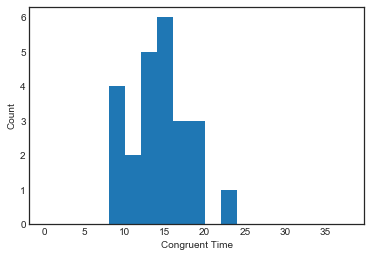

In [117]:
#histogram of Congruent time
plt.hist(data.Congruent,bins=np.arange(0,40,2))
plt.ylabel('Count')
plt.xlabel('Congruent Time')
plt.show()

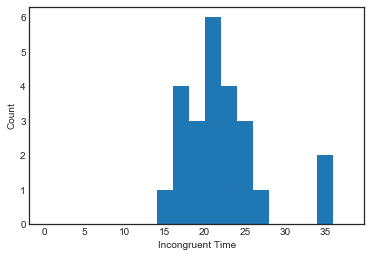

In [118]:
#histogram of Incongruent time
plt.hist(data.Incongruent,bins=np.arange(0,40,2))
plt.ylabel('Count')
plt.xlabel('Incongruent Time')
plt.show()

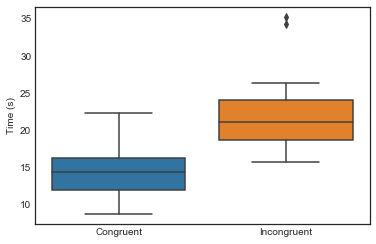

In [122]:
#boxplot of times
sns.boxplot(data=data)
plt.ylabel("Time (s)")
plt.show()

### 5. T-test for difference in means

In [17]:
test = stats.ttest_rel(data.Congruent,data.Incongruent)

In [19]:
test_statistic = test.statistic
p_value = test.pvalue
confidence_interval = .95
critical_value =  2.069

In [47]:
results = {
    'test statistic':abs(test_statistic),
    'critical value':critical_value,
    'p value':p_value}

In [56]:
results

{'critical value': 2.069,
 'p value': 4.1030005857111781e-08,
 'test statistic': 8.020706944109957}

The absolute value of my test statistic, 8.02, is greater than my critical value, 2.069, with a p-value of less than .05. I can therefore reject the null hypothesis at 95% confidence. This meets our expectations, given the very different distributions of the congruent and incongruent times, that it takes someone much longer to read the incogruent word list.

### 6. Further research

This experiment suggests that our brain is better at processing "matching" information compared to "mismatched" information. Since a user always sees the incongruent word list second, they may have improved their understanding of the task generally, offseting the difference in time. Switching up the order of the word lists could cause an even greater difference in time. An alternative task might include looking at words and pictures that do or do not match.

### Appendix: Resources consulted

Seaborn visualizations guide: http://seaborn.pydata.org/tutorial.html

Paired t-test hypotheses: http://stattrek.com/hypothesis-test/paired-means.aspx?Tutorial=AP

t-test formulas: http://stattrek.com/hypothesis-test/difference-in-means.aspx?Tutorial=AP

t distribution table:
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf